# Using TF-IDF to Compare Word Frequencies of Bee Gees Albums 
## (to be compared to Top Billboard 100 Hits' TF-IDF Data)
### Attempt 1: with stopwords included

**RESULTS:** The visualized data is extremely hard to read because of how many words were included

### Attempt 2: stopwords excluded
- to try and reduce the frequency and number of words shown, possibly to find more unique word frequencies

**RESULTS:** more understandandable representation of the top 10 words in each album, but some groups of letters such as "ll," "an," etc. (which were most likely broken from whole words) were included in the results

### Attempt 3: stopwords + words less than 3 letters excluded

**RESULTS:** seemingly more accurate and understandable representation of the top 10 words in each album

### Attempt 4: improving visualization

**RESULTS:** changed tf-idf score in x-axis to term frequency to be more visually understandable, and assigned each word a color (though some colors overlap, which does not yield the easiest analyzing)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the file path
file_lyrics_path = '/Users/maika/My_Notebooks/DSMA/Final Project/scraped lyrics/trafalgar copy 3.txt'

# Open and read the file content
with open(file_lyrics_path, encoding='utf-8-sig') as file:
    text = file.read()

# If you have multiple documents, make sure to split the text into a list of strings (documents).
# For example, split by newline to create a list of strings, if each line is a document:
documents = text.split('\n')

# If it's just a single document, you can simply pass a list with one element:
# documents = [text]

# Initialize the TfidfVectorizer
tfidf = TfidfVectorizer()

# Fit the vectorizer and transform the documents
result = tfidf.fit_transform(documents)

# To view the result (e.g., the TF-IDF matrix)
print(result.shape)  # This will give you the shape of the matrix: (number of documents, number of features)


(14, 415)


In [29]:
# Convert the sparse matrix to an array and print it (if it's not too large)
print(result.toarray())

# Alternatively, check the feature names (terms/words) used in the TF-IDF matrix
print(tfidf.get_feature_names_out())


[[0.07650425 0.         0.08463888 ... 0.16668553 0.05495367 0.        ]
 [0.08857573 0.         0.         ... 0.26535653 0.         0.1328636 ]
 [0.         0.         0.         ... 0.04321835 0.         0.15868866]
 ...
 [0.         0.         0.08230587 ... 0.08104548 0.         0.        ]
 [0.         0.         0.         ... 0.17023103 0.         0.0961619 ]
 [0.         0.         0.         ... 0.09421958 0.         0.        ]]
['about' 'address' 'again' 'ahh' 'all' 'alone' 'am' 'an' 'and' 'another'
 'answer' 'anymore' 'arise' 'arms' 'arose' 'around' 'as' 'ask' 'at' 'away'
 'babe' 'baby' 'back' 'balcony' 'balloon' 'based' 'be' 'beautiful' 'been'
 'before' 'begin' 'beginning' 'believe' 'bendin' 'better' 'between' 'big'
 'born' 'both' 'bout' 'breeze' 'bring' 'broke' 'broken' 'brown' 'buried'
 'but' 'by' 'call' 'calling' 'calls' 'came' 'can' 'cause' 'cave' 'charms'
 'climb' 'clown' 'cold' 'colder' 'come' 'could' 'country' 'cried' 'crime'
 'cross' 'crown' 'cry' 'darkness' 'daug

In [31]:
# Get the TF-IDF scores for each term
scores = result.sum(axis=0).A1  # Sum TF-IDF scores across all documents

# Create a dictionary of terms and their corresponding scores
term_score_dict = dict(zip(unique_terms, scores))

# Sort the terms based on their score in descending order
sorted_terms_by_score = sorted(term_score_dict.items(), key=lambda x: x[1], reverse=True)

# Show the top N terms
top_n = 10  # For example, top 10 terms
print(f"Top {top_n} Terms by TF-IDF Score:")
for term, score in sorted_terms_by_score[:top_n]:
    print(f"{term}: {score}")


Top 10 Terms by TF-IDF Score:
you: 1.952781531584312
the: 1.912531637920869
my: 1.0934865704845782
can: 0.9700795775907407
and: 0.947214919350284
me: 0.9205567645616003
in: 0.8550382133353116
don: 0.7869317009051371
that: 0.773768829164513
israel: 0.7634966520854491


In [32]:
tfidf = TfidfVectorizer(stop_words='english')

# Fit the vectorizer and transform the documents
result = tfidf.fit_transform(documents)

# Get the unique terms (features)
unique_terms = tfidf.get_feature_names_out()

# View the unique terms excluding stop words
print("Unique Terms Excluding Stop Words:")
print(unique_terms)

# Optionally, you can also get the number of unique terms
print(f"\nTotal number of unique terms excluding stop words: {len(unique_terms)}")

Unique Terms Excluding Stop Words:
['address' 'ahh' 'answer' 'anymore' 'arise' 'arms' 'arose' 'ask' 'away'
 'babe' 'baby' 'balcony' 'balloon' 'based' 'beautiful' 'begin' 'beginning'
 'believe' 'bendin' 'better' 'big' 'born' 'bout' 'breeze' 'bring' 'broke'
 'broken' 'brown' 'buried' 'calling' 'calls' 'came' 'cause' 'cave'
 'charms' 'climb' 'clown' 'cold' 'colder' 'come' 'country' 'cried' 'crime'
 'cross' 'crown' 'darkness' 'daughter' 'days' 'dead' 'dearest' 'devil'
 'did' 'dig' 'disguise' 'doin' 'don' 'door' 'dream' 'dreams' 'embraces'
 'end' 'ends' 'exactly' 'eyes' 'face' 'faces' 'facing' 'fall' 'falling'
 'february' 'feel' 'feeling' 'fell' 'fine' 'fit' 'fits' 'flown' 'forgive'
 'fortunes' 'friend' 'friends' 'frozen' 'game' 'gave' 'getting' 'girl'
 'glory' 'gone' 'gonna' 'good' 'goodbye' 'got' 'grand' 'grass' 'graveyard'
 'greatest' 'green' 'growing' 'grows' 'hand' 'hard' 'hat' 'haven' 'head'
 'hear' 'heard' 'heart' 'heaven' 'heavens' 'help' 'hen' 'hiding' 'high'
 'hole' 'home' 'hope' 

In [46]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Define the directory containing your files
directory_path = '/Users/maika/My_Notebooks/DSMA/Final Project/scraped lyrics/'

# List to store the content of all files in an empty document
documents = []

# Read all files in the directory (text files)
for filename in os.listdir(directory_path):
    if filename.endswith('.txt'):  # Ensure reading only text files
        file_path = os.path.join(directory_path, filename)
        with open(file_path, encoding='utf-8-sig') as file:
            documents.append(file.read())  # Add content to the list

# Initialize the TfidfVectorizer with stop words excluded
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the documents
#tfidf_matrix = tfidf.fit_transform(documents)

# Get the feature names (terms)
#terms = tfidf.get_feature_names_out()

# Loop through each document and get the top 10 terms by TF-IDF score
#for i, doc in enumerate(documents):
    # Get the TF-IDF scores for the current document (as a 1D array)
    #scores = tfidf_matrix[i].toarray().flatten()

    # Get the top 10 indices (terms with the highest scores)
    #top_indices = np.argsort(scores)[::-1][:10]

    # Get the corresponding top 10 terms and their scores
    #top_terms = [terms[index] for index in top_indices]
    #top_scores = [scores[index] for index in top_indices]

    # Print the result for the current document
    #print(f"\nTop 10 terms for file {os.listdir(directory_path)[i]}:")
    #for term, score in zip(top_terms, top_scores):
        #print(f"{term}: {score:.4f}")


In [48]:
#trying with stop words INCLUDED
#tfidf = TfidfVectorizer()

# getting tf-df values 
results = tfidf.fit_transform(documents)


In [49]:
# get idf values
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
	print(ele1, ':', ele2)


idf values:
10 : 3.1972245773362196
12 : 3.1972245773362196
1st : 3.1972245773362196
50 : 3.1972245773362196
able : 3.1972245773362196
accused : 3.1972245773362196
ace : 3.1972245773362196
acknowledge : 3.1972245773362196
act : 3.1972245773362196
address : 3.1972245773362196
advantage : 2.791759469228055
advice : 2.504077396776274
aeroplane : 3.1972245773362196
affair : 3.1972245773362196
affection : 2.504077396776274
afraid : 3.1972245773362196
afternoon : 3.1972245773362196
age : 2.791759469228055
ago : 2.791759469228055
agree : 3.1972245773362196
ah : 1.587786664902119
ahead : 2.504077396776274
ahh : 3.1972245773362196
aim : 3.1972245773362196
ain : 1.4054651081081644
air : 1.6931471805599454
alan : 3.1972245773362196
alive : 2.09861228866811
allons : 3.1972245773362196
alright : 2.791759469228055
amplight : 3.1972245773362196
angel : 2.791759469228055
anger : 3.1972245773362196
angry : 3.1972245773362196
answer : 2.791759469228055
answered : 3.1972245773362196
anticipate : 3.19722

In [50]:
# get indexing
print('\nWord indexes:')
print(tfidf.vocabulary_)

# display tf-idf values
print('\ntf-idf value:')
print(result)

# in matrix form
print('\ntf-idf values in matrix form:')
dense_matrix = result.toarray()
print(dense_matrix)


Word indexes:
{'happening': 695, 'turn': 1678, 'century': 230, 'gonna': 652, 'buy': 200, 'time': 1628, 'machine': 953, 'people': 1139, 'passing': 1128, 'town': 1645, 'crier': 325, 'makes': 960, 'big': 122, 'wide': 1761, 'hats': 705, 'men': 989, 'spats': 1470, 'horseless': 757, 'carriages': 214, 'lots': 937, 'things': 1606, 'bicycle': 120, 'built': 187, 'ooh': 1096, 'holiday': 750, 'think': 1607, 'worthwhile': 1800, 'puppet': 1207, 'smile': 1435, 'throwing': 1618, 'stones': 1520, 'funny': 611, 'game': 616, 'don': 413, 'believe': 108, 've': 1703, 'just': 826, 'said': 1316, 'soft': 1443, 'pillow': 1151, 'head': 709, 'millions': 1002, 'eyes': 499, 'blind': 132, 'unkind': 1693, 'red': 1243, 'chair': 236, 'fade': 504, 'away': 67, 'bring': 174, 'memories': 987, 'nice': 1069, 'fragrant': 595, 'lemon': 883, 'trees': 1664, 'feel': 529, 'speaking': 1472, 'sky': 1425, 'want': 1729, 'know': 847, 'filling': 546, 'air': 25, 'grandpa': 662, 'fairy': 507, 'tale': 1580, 'round': 1295, 'rainbows': 1219,

In [41]:
# making heatmap visualization of each document index
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the feature names (words in the corpus)
words = np.array(list(tfidf.vocabulary_.keys()))
words

array(['everything', 'happening', 'at', ..., 'apples', 'recall', 'cheek'],
      dtype='<U14')

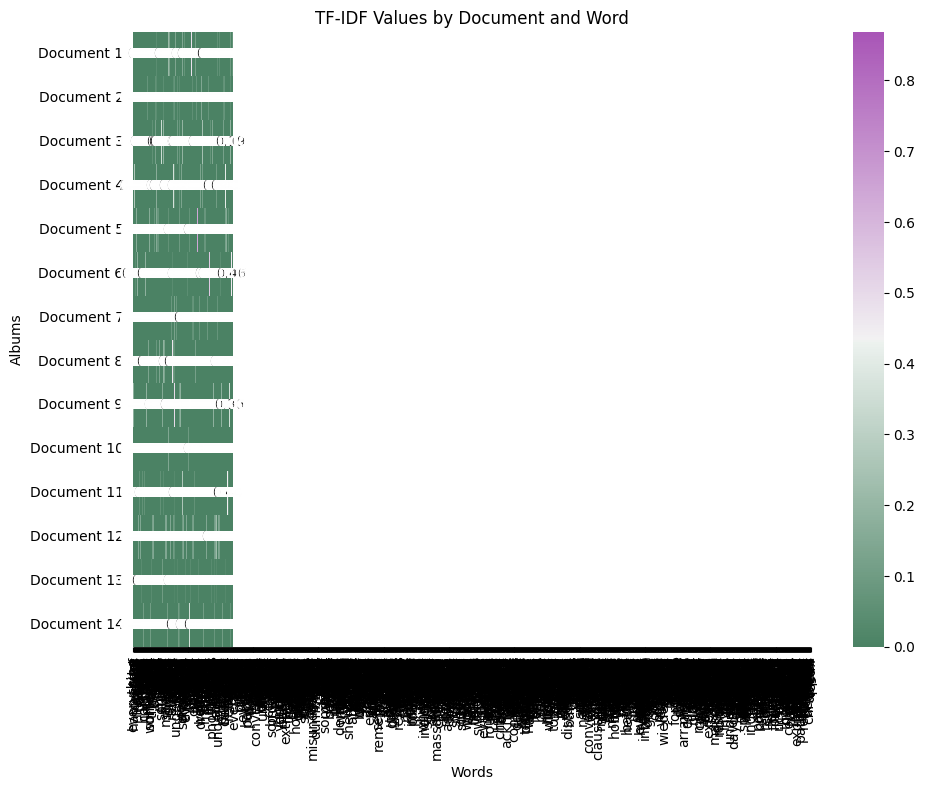

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(dense_matrix, 
            cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True), # Color map
            xticklabels=words, # Words for the columns
            yticklabels=[f'Document {i+1}' for i in range(dense_matrix.shape[0])], # Document indexes
            annot=True, # Annotate cells with the numeric values
            fmt='.2f', # Format the numbers to two decimal places
            cbar=True) # Show color bar

# Set labels and title
plt.title("TF-IDF Values by Document and Word")
plt.xlabel("Words")
plt.ylabel("Albums")

# Show the plot
plt.tight_layout()
plt.show()

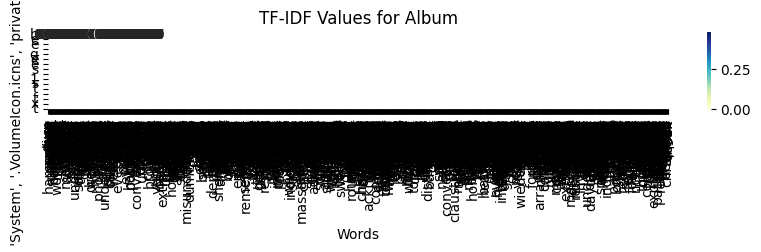

FileNotFoundError: [Errno 2] No such file or directory: 'U'

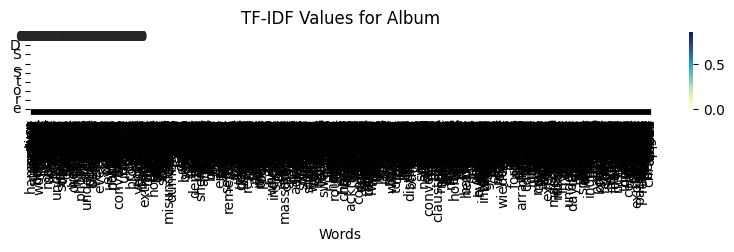

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the feature names (words in the corpus)
words = np.array(list(tfidf.vocabulary_.keys()))

# Create a heatmap for each document
for i in range(dense_matrix.shape[0]):
    # Extract the TF-IDF values for the current document
    doc_tfidf = dense_matrix[i]
    
    # Create a figure and axis for the heatmap
    plt.figure(figsize=(10, 1))  # Height is smaller since it's just one row per document
    
    # Create the heatmap
    sns.heatmap(doc_tfidf.reshape(1, -1),  # Reshape to 1xN matrix (1 row, N columns)
                cmap='YlGnBu',  # Color map
                xticklabels=words,  # Words as x-axis labels
                yticklabels=[f'Document {i+1}'],  # Document label on y-axis
                annot=True,  # Annotate with values
                fmt='.2f',  # Format annotations to 2 decimal places
                cbar=True)  # Show color bar
    
    # Set the title and labels for clarity
    plt.title("TF-IDF Values for Album") 
    plt.xlabel("Words")
    plt.ylabel("Album")
    
    # Display the heatmap
    plt.show()


In [1]:
#attempt 2: trying tf-idf top 10 terms for each file (album) with stopwords EXCLUDED:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Define the directory containing your files
directory_path = '/Users/maika/My_Notebooks/DSMA/Final_Project/scraped_lyrics'

# List to store the content of all files
documents = []

# Read all files in the directory (assuming text files)
for filename in os.listdir(directory_path):
    if filename.endswith('.txt'):  # Ensure we're reading only text files
        file_path = os.path.join(directory_path, filename)
        with open(file_path, encoding='utf-8-sig') as file:
            documents.append(file.read())  # Add content to the list

# Initialize the TfidfVectorizer with stop words excluded
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the documents
tfidf_matrix = tfidf.fit_transform(documents)

# Get the feature names (terms)
terms = tfidf.get_feature_names_out()

# Loop through each document and get the top 10 terms by TF-IDF score
for i, doc in enumerate(documents):
    # Get the TF-IDF scores for the current document (as a 1D array)
    scores = tfidf_matrix[i].toarray().flatten()

    # Get the top 10 indices (terms with the highest scores)
    top_indices = np.argsort(scores)[::-1][:10]

    # Get the corresponding top 10 terms and their scores
    top_terms = [terms[index] for index in top_indices]
    top_scores = [scores[index] for index in top_indices]

    # Print the result for the current document
    print(f"\nTop 10 terms for file {os.listdir(directory_path)[i]}:")
    for term, score in zip(top_terms, top_scores):
        print(f"{term}: {score:.4f}")



Top 10 terms for file bee_gees_1st.txt:
century: 0.3684
chair: 0.2246
jones: 0.1700
lords: 0.1700
house: 0.1610
sad: 0.1579
turn: 0.1499
cucumber: 0.1417
humble: 0.1417
mr: 0.1353

Top 10 terms for file .DS_Store:
na: 0.3300
bad: 0.2635
road: 0.1954
doo: 0.1938
don: 0.1807
love: 0.1619
ah: 0.1567
lost: 0.1544
ve: 0.1468
unwise: 0.1467

Top 10 terms for file to_whom_it_may_concern.txt:
jive: 0.4347
talkin: 0.3905
love: 0.2663
bird: 0.1670
just: 0.1574
tender: 0.1449
like: 0.1393
ll: 0.1331
away: 0.1218
know: 0.1089

Top 10 terms for file main_course.txt:
love: 0.2281
civilization: 0.1938
got: 0.1568
ohh: 0.1543
party: 0.1415
gonna: 0.1308
movin: 0.1157
know: 0.1141
time: 0.1141
make: 0.1093

Top 10 terms for file high_civilization.txt:
country: 0.3007
israel: 0.2833
women: 0.2516
trafalgar: 0.2361
lion: 0.2287
don: 0.1891
dearest: 0.1889
ya: 0.1879
greatest: 0.1871
crown: 0.1663

Top 10 terms for file trafalgar.txt:
braff: 0.4779
harry: 0.4552
flag: 0.2731
checkered: 0.2503
ve: 0.1472



Top 10 terms for file bee_gees_1st.txt:
century: 0.3734
chair: 0.2277
jones: 0.1723
lords: 0.1723
house: 0.1632
sad: 0.1601
turn: 0.1520
humble: 0.1436
cucumber: 0.1436
know: 0.1352


/Users/maika/Library/Python/3.9/lib/python/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


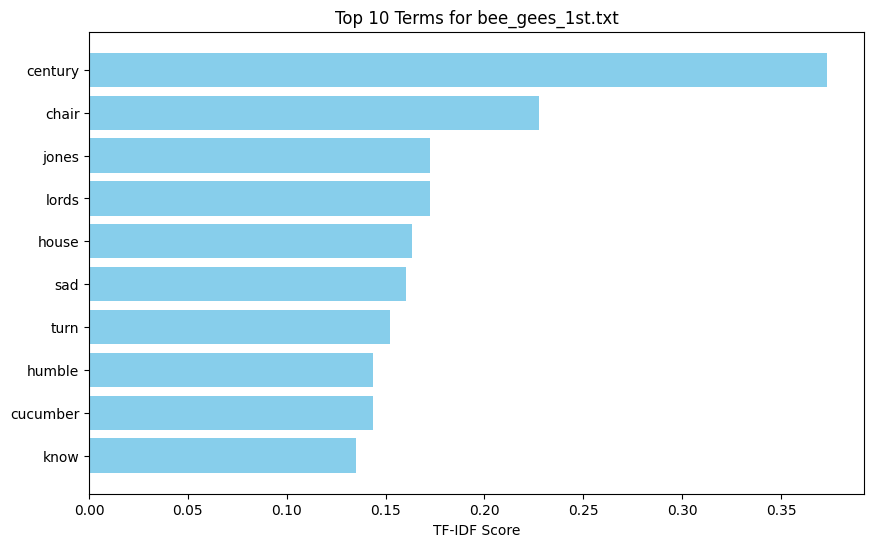


Top 10 terms for file to_whom_it_may_concern.txt:
bad: 0.2890
road: 0.2143
doo: 0.2125
don: 0.1982
love: 0.1775
lost: 0.1693
unwise: 0.1609
know: 0.1539
lights: 0.1428
got: 0.1420


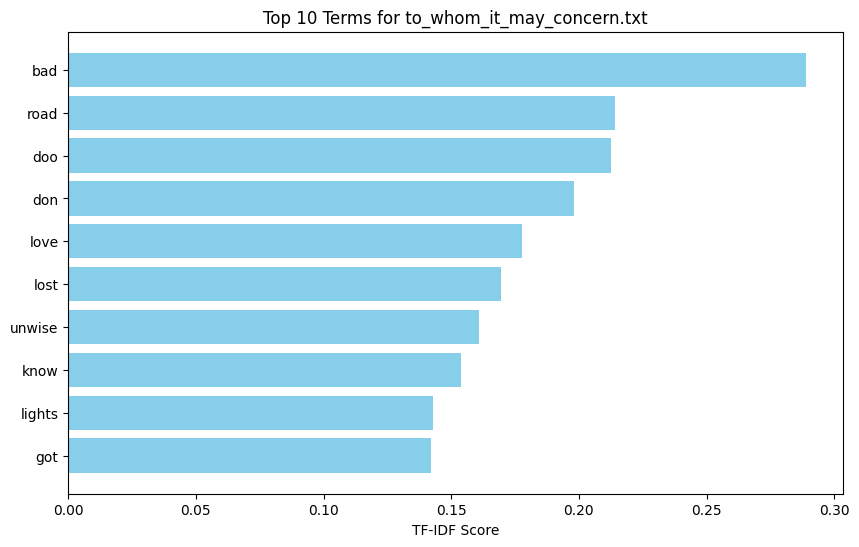


Top 10 terms for file main_course.txt:
jive: 0.4402
talkin: 0.3955
love: 0.2697
bird: 0.1691
just: 0.1594
tender: 0.1467
like: 0.1411
away: 0.1234
know: 0.1103
singin: 0.1100


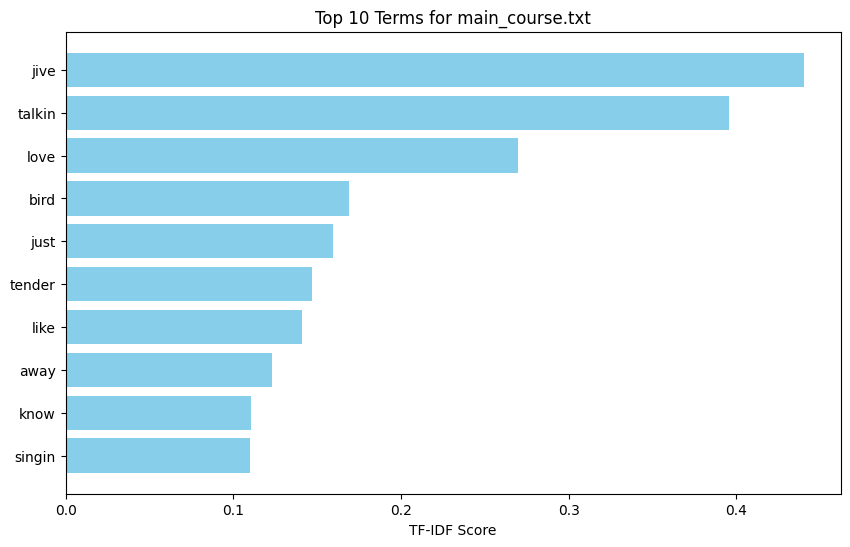


Top 10 terms for file high_civilization.txt:
love: 0.2298
civilization: 0.1952
got: 0.1580
ohh: 0.1554
party: 0.1426
gonna: 0.1317
movin: 0.1165
know: 0.1149
time: 0.1149
make: 0.1101


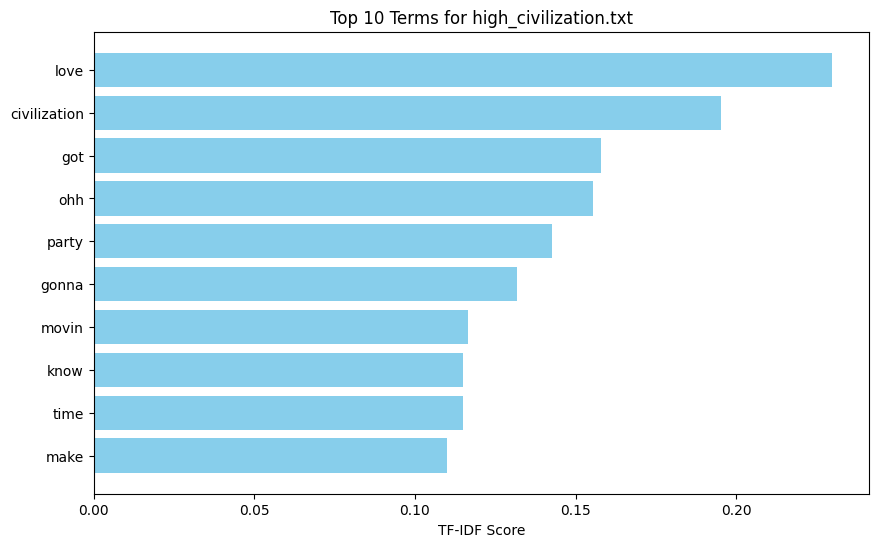


Top 10 terms for file trafalgar.txt:
country: 0.3103
israel: 0.2924
women: 0.2597
trafalgar: 0.2437
lion: 0.2361
don: 0.1951
dearest: 0.1949
greatest: 0.1931
remembering: 0.1717
crown: 0.1717


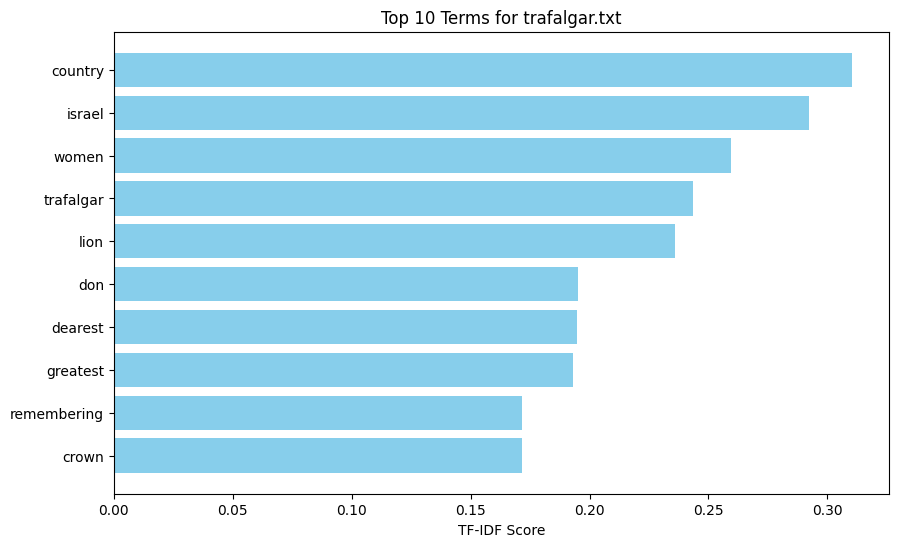


Top 10 terms for file horizontal.txt:
braff: 0.4852
harry: 0.4621
flag: 0.2772
checkered: 0.2541
love: 0.1360
goodbye: 0.1310
got: 0.1224
rains: 0.1221
forgettin: 0.1155
course: 0.1155


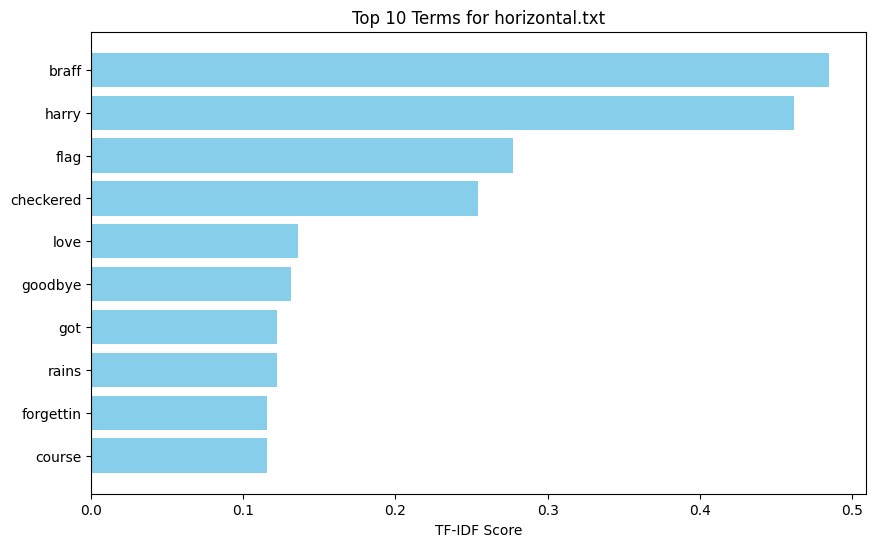


Top 10 terms for file cucumber_castle.txt:
love: 0.3244
lay: 0.2700
left: 0.2601
sing: 0.2250
forget: 0.1920
lord: 0.1543
wowzey: 0.1520
believe: 0.1411
long: 0.1366
stand: 0.1299


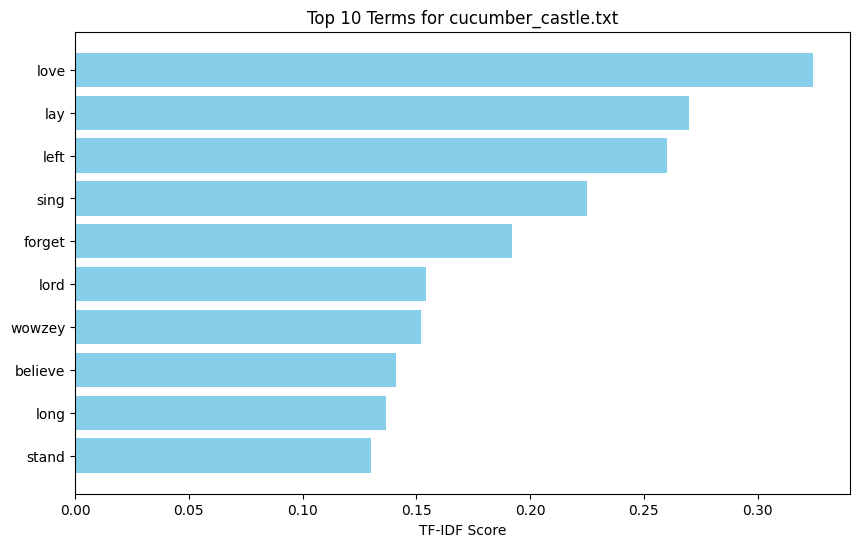


Top 10 terms for file this_is_where_i_came_in.txt:
know: 0.3362
don: 0.2377
dedication: 0.1852
baby: 0.1667
embrace: 0.1544
like: 0.1521
lives: 0.1462
keeps: 0.1462
love: 0.1363
heart: 0.1309


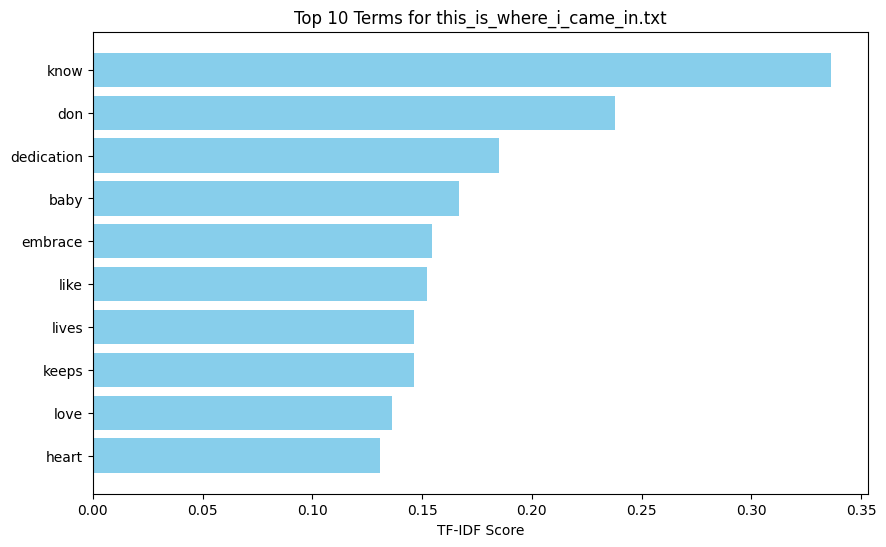


Top 10 terms for file idea.txt:
kitty: 0.3020
millions: 0.2885
eve: 0.2718
pleases: 0.2416
gin: 0.2114
whisky: 0.2114
dry: 0.1862
indian: 0.1510
mother: 0.1431
earth: 0.1431


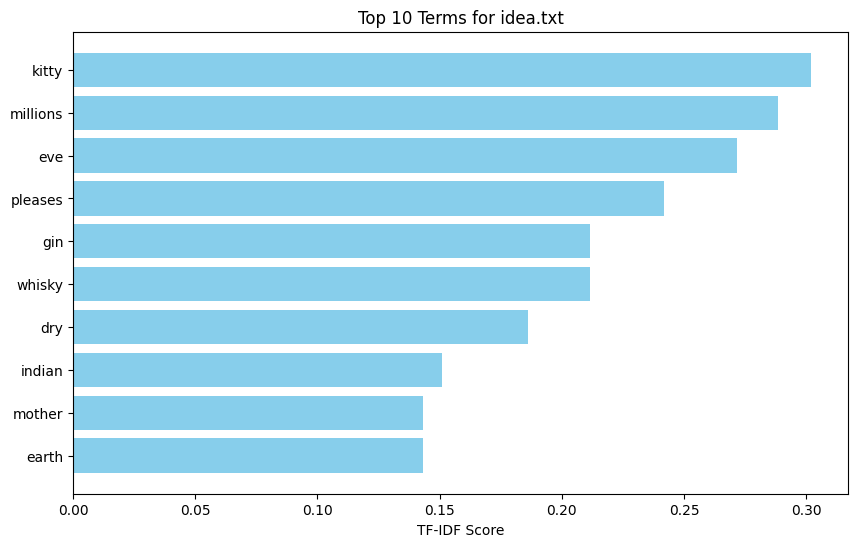


Top 10 terms for file barry_gibb_songs.txt:
timber: 0.3720
don: 0.3208
love: 0.2336
hadn: 0.1984
make: 0.1759
wind: 0.1758
boys: 0.1747
mind: 0.1665
know: 0.1606
wouldn: 0.1579


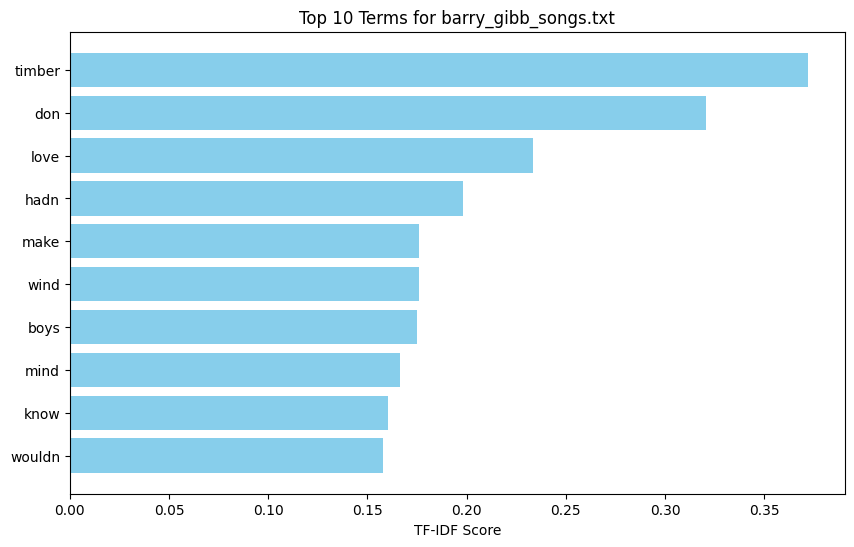


Top 10 terms for file spirits_having_flown.txt:
livin: 0.3744
instead: 0.2965
love: 0.2727
tragedy: 0.2611
got: 0.1854
ain: 0.1810
holdin: 0.1482
living: 0.1425
harder: 0.1306
lovin: 0.1180


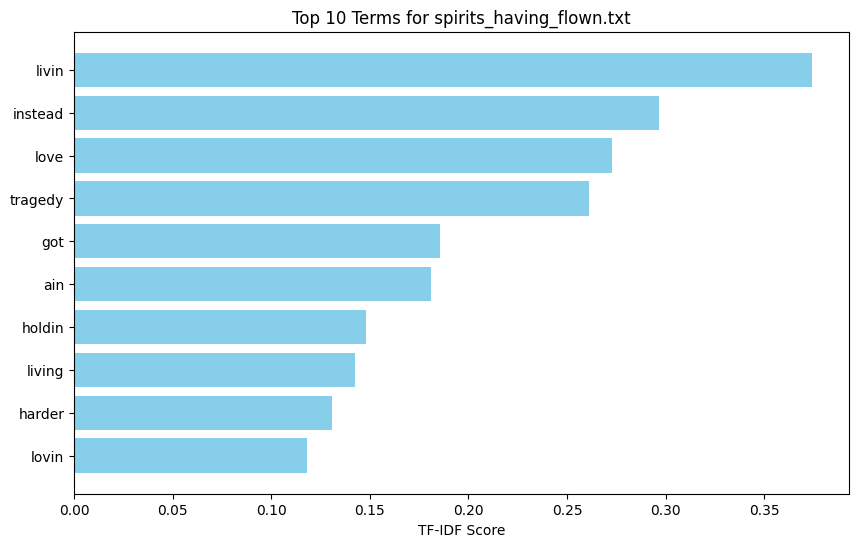


Top 10 terms for file esp.txt:
love: 0.2779
don: 0.2776
ghost: 0.2050
giving: 0.2033
know: 0.1768
stay: 0.1735
crazy: 0.1674
higher: 0.1452
baby: 0.1448
alive: 0.1355


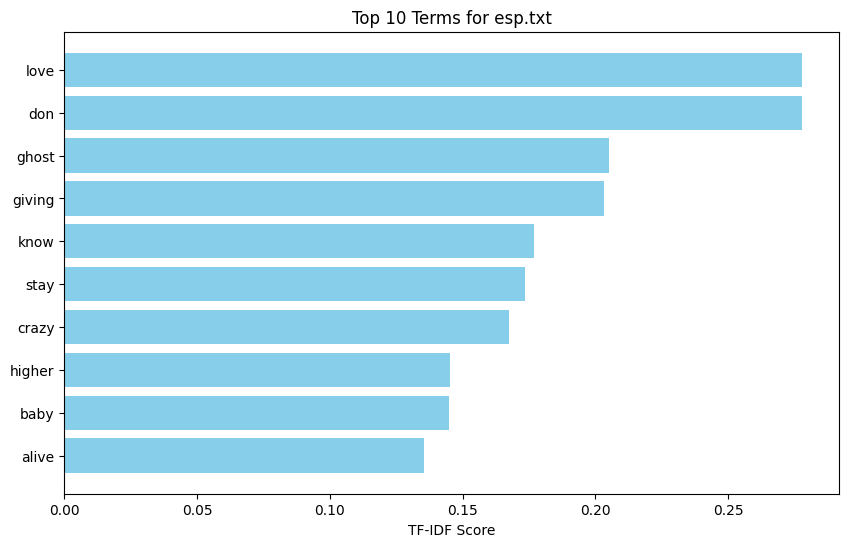


Top 10 terms for file turn_around_look_at_us.txt:
cherry: 0.3304
gone: 0.2711
kiss: 0.2236
red: 0.2009
love: 0.1856
sweeter: 0.1802
dress: 0.1802
blue: 0.1626
don: 0.1573
california: 0.1502


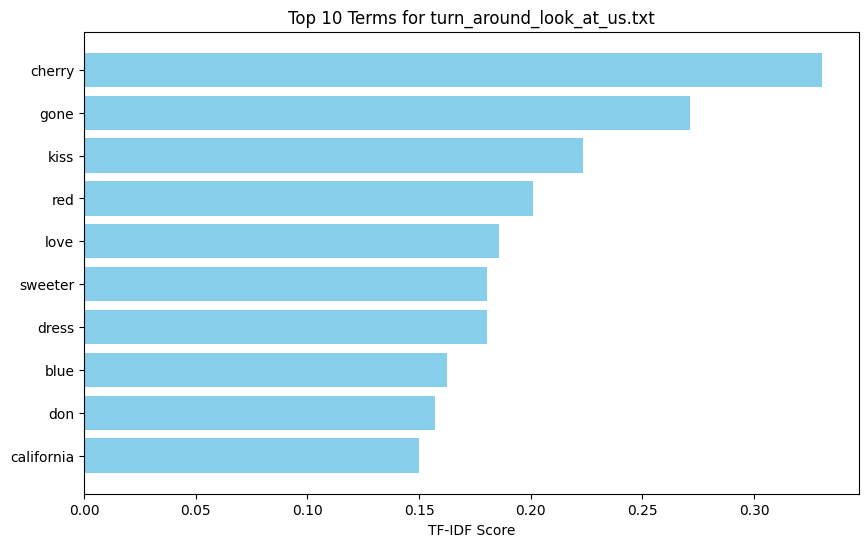


Top 10 terms for file saturday_night_fever.txt:
jive: 0.4674
talkin: 0.4199
stayin: 0.3096
dancing: 0.2112
yeah: 0.2090
woman: 0.1882
alive: 0.1630
hey: 0.1615
doin: 0.1571
fever: 0.1558


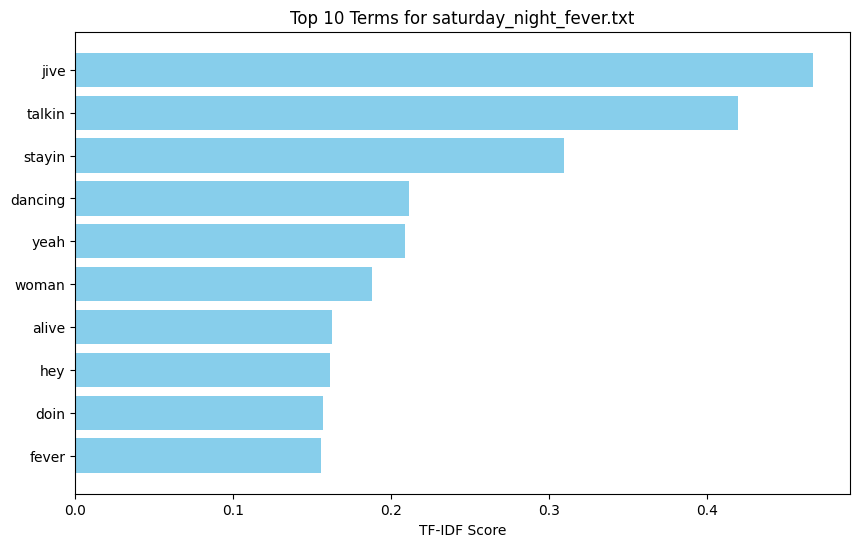


Top 10 terms for file size_isnt_everything.txt:
island: 0.3274
doing: 0.2690
dancing: 0.2606
blue: 0.2492
love: 0.1927
know: 0.1204
night: 0.1134
yeah: 0.1105
angel: 0.1081
makes: 0.1033


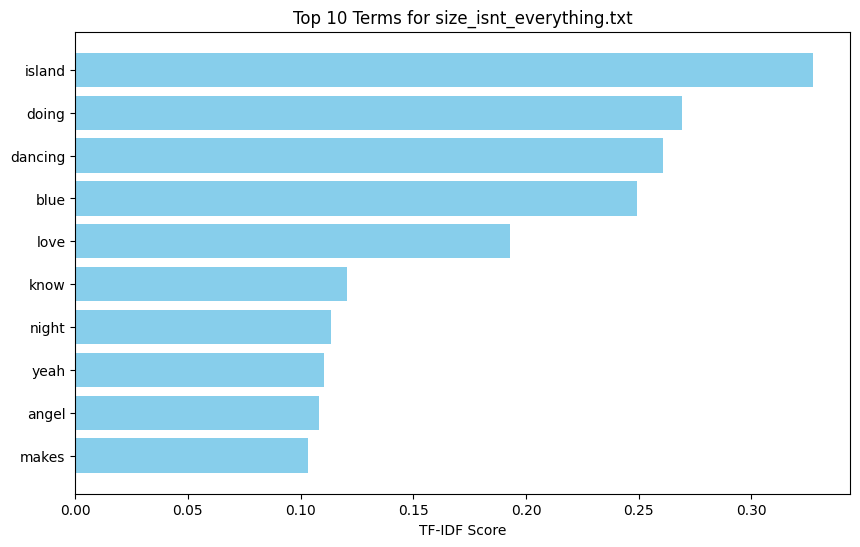


Top 10 terms for file mr_natural.txt:
doo: 0.5441
road: 0.2743
spoke: 0.2574
dee: 0.2059
heavy: 0.1545
love: 0.1515
breaking: 0.1434
breathing: 0.1287
don: 0.1269
voices: 0.1229


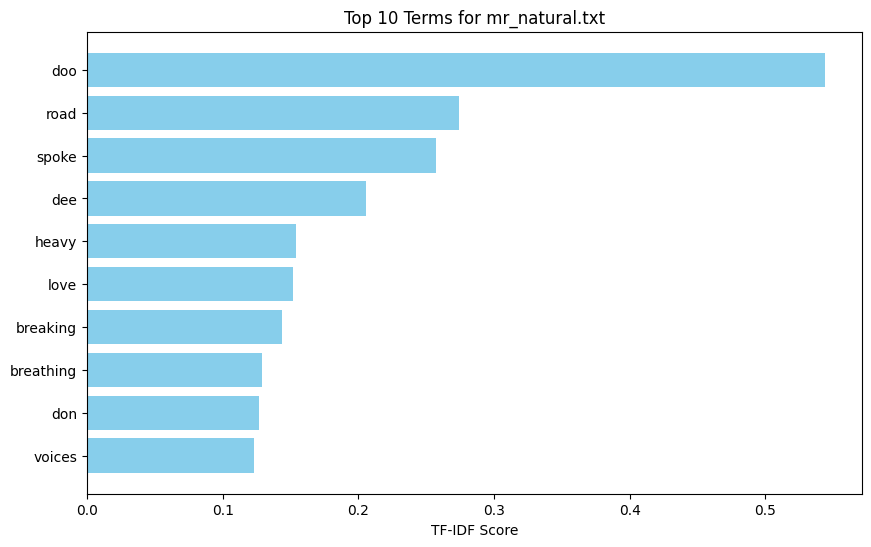


Top 10 terms for file two_years_on.txt:
tell: 0.3085
critter: 0.2500
home: 0.1851
seasons: 0.1835
mistake: 0.1835
low: 0.1826
onely: 0.1667
1st: 0.1667
nights: 0.1453
did: 0.1453


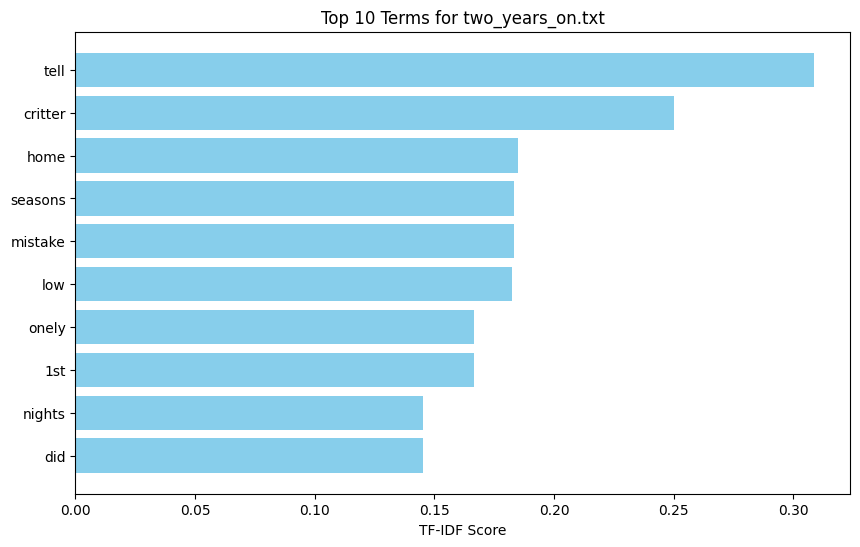


Top 10 terms for file odessa.txt:
whisper: 0.3438
edison: 0.2509
sunday: 0.1719
family: 0.1673
skids: 0.1673
kids: 0.1673
fair: 0.1473
say: 0.1374
face: 0.1362
drive: 0.1332


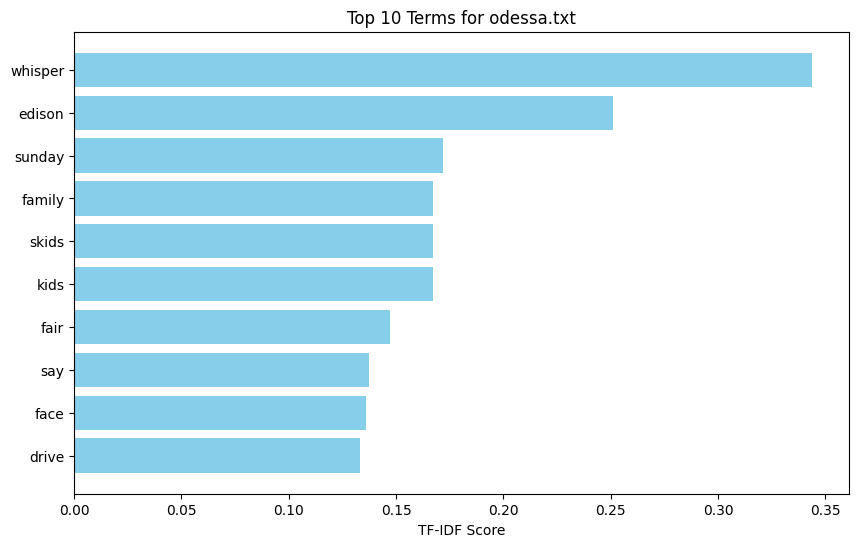


Top 10 terms for file one.txt:
ordinary: 0.4353
tokyo: 0.2176
lives: 0.1964
love: 0.1815
tonight: 0.1590
living: 0.1550
wing: 0.1451
neighborhood: 0.1451
don: 0.1341
belong: 0.1145


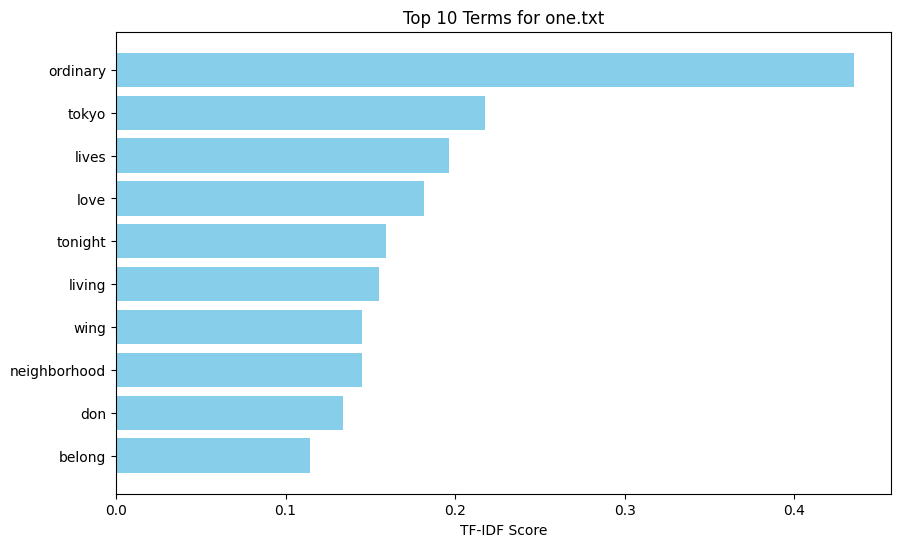


Top 10 terms for file spicks_and_specks.txt:
play: 0.2589
monday: 0.2556
love: 0.2364
glad: 0.2191
baby: 0.1971
don: 0.1912
tint: 0.1826
born: 0.1537
high: 0.1476
man: 0.1462


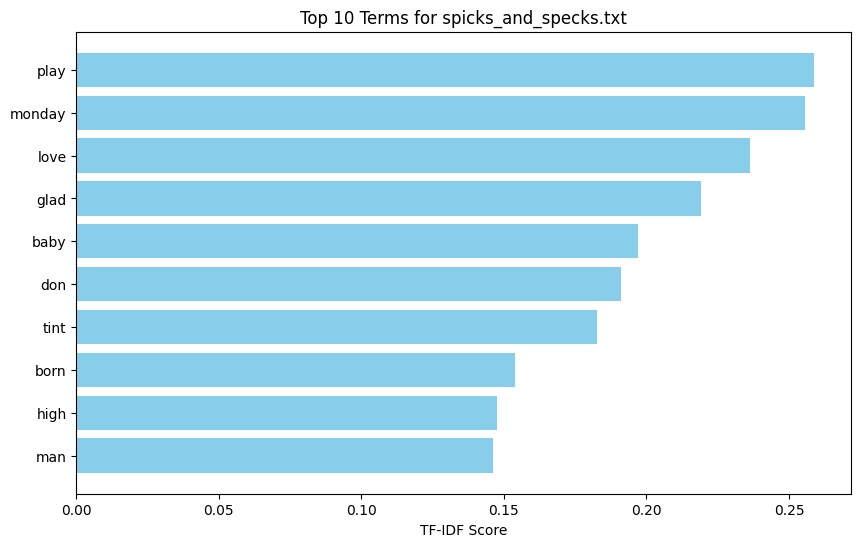


Top 10 terms for file children_of_the_world.txt:
stepped: 0.4406
lovers: 0.3585
love: 0.2419
ooh: 0.2116
life: 0.1788
make: 0.1728
dancing: 0.1707
sexy: 0.1430
subway: 0.1430
boogie: 0.1430


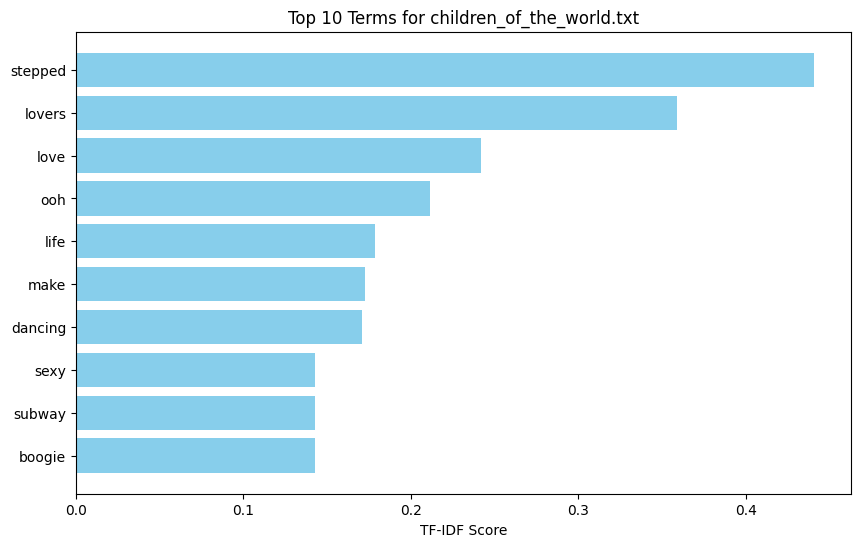

In [4]:
#attempt 3.2: with tokenizer that EXCLUDES words less than 3 letters AND stopwords
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re
import matplotlib.pyplot as plt

# Define the directory containing your files
directory_path = '/Users/maika/My_Notebooks/DSMA/Final_Project/scraped_lyrics'

# List to store the content of all files and their filenames
documents = []
file_names = []

# Read all files in the directory (assuming text files)
for filename in os.listdir(directory_path):
    if filename.endswith('.txt'):  # Ensure we're reading only text files
        file_path = os.path.join(directory_path, filename)
        with open(file_path, encoding='utf-8-sig') as file:
            documents.append(file.read())  # Add content to the list
            file_names.append(filename)  # Add the filename to the list

# Define a custom tokenizer that filters out words with fewer than 3 characters
def custom_tokenizer(text):
    # Use regular expression to split the text into words and filter based on length
    words = re.findall(r'\b\w{3,}\b', text.lower())  # Words with 3 or more letters
    return words

# Initialize the TfidfVectorizer with stop words excluded and the custom tokenizer
tfidf = TfidfVectorizer(stop_words='english', tokenizer=custom_tokenizer)

# Fit and transform the documents
tfidf_matrix = tfidf.fit_transform(documents)

# Get the feature names (terms)
terms = tfidf.get_feature_names_out()

# Loop through each document and get the top 10 terms by TF-IDF score
for i, doc in enumerate(documents):
    # Get the TF-IDF scores for the current document (as a 1D array)
    scores = tfidf_matrix[i].toarray().flatten()

    # Get the top 10 indices (terms with the highest scores)
    top_indices = np.argsort(scores)[::-1][:10]

    # Get the corresponding top 10 terms and their scores
    top_terms = [terms[index] for index in top_indices]
    top_scores = [scores[index] for index in top_indices]

    # Print the result for the current document
    print(f"\nTop 10 terms for file {file_names[i]}:")
    for term, score in zip(top_terms, top_scores):
        print(f"{term}: {score:.4f}")

    # Create a bar chart for the top 10 terms
    plt.figure(figsize=(10, 6))
    plt.barh(top_terms, top_scores, color='skyblue')
    plt.xlabel('TF-IDF Score')
    plt.title(f'Top 10 Terms for {file_names[i]}')
    plt.gca().invert_yaxis()  # To display the highest score at the top
    plt.show()



Top 10 terms for file bee_gees_1st.txt:
know: 16
don: 15
century: 13
turn: 13
eyes: 11
away: 11
sad: 10
love: 10
time: 9
chair: 9


/var/folders/2r/034sbqqn6fs4y2bgpc8dfpd40000gn/T/ipykernel_67555/1042772166.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', len(unique_terms))  # Create a color map (20 colors)


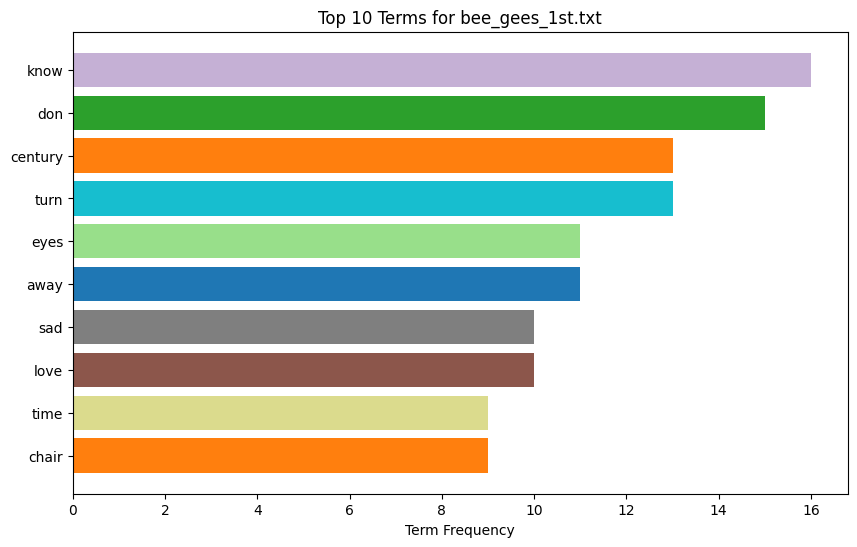


Top 10 terms for file to_whom_it_may_concern.txt:
don: 16
bad: 16
love: 15
know: 13
got: 12
just: 10
make: 10
road: 9
lost: 8
lights: 6


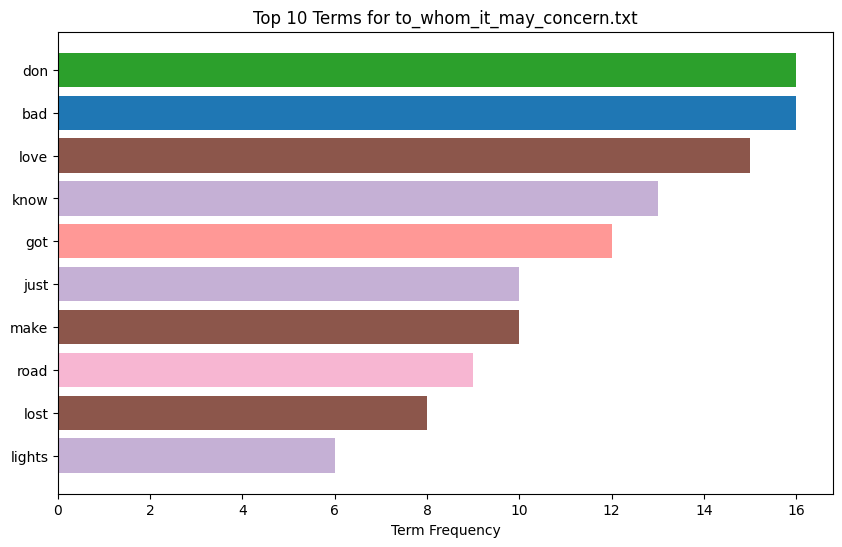


Top 10 terms for file main_course.txt:
love: 22
talkin: 13
just: 13
jive: 12
like: 11
know: 9
away: 8
live: 7
yeah: 7
bird: 6


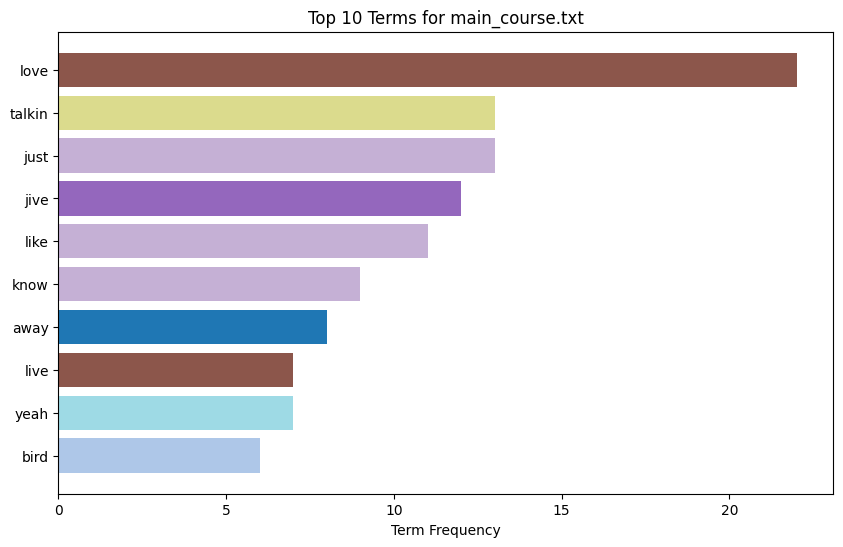


Top 10 terms for file high_civilization.txt:
love: 16
got: 11
gonna: 8
know: 8
time: 8
say: 7
don: 7
make: 7
let: 6
heart: 6


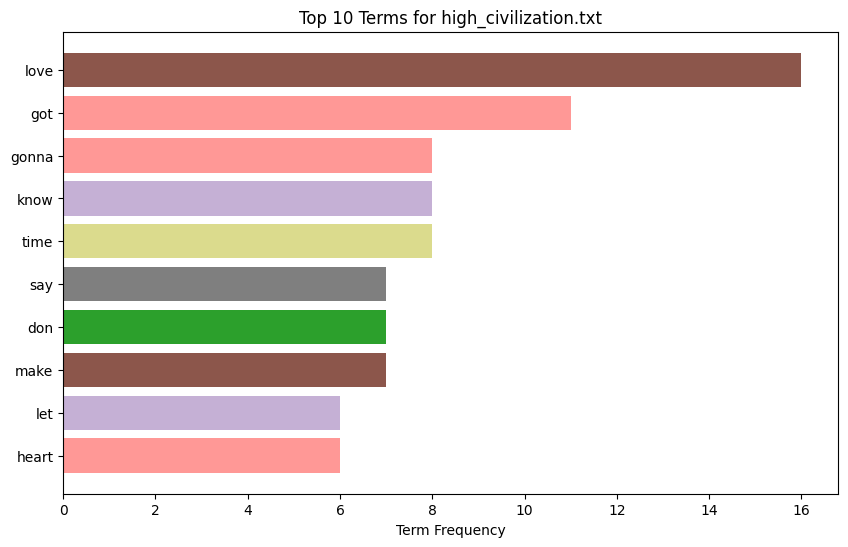


Top 10 terms for file trafalgar.txt:
don: 26
know: 21
life: 19
women: 18
love: 16
country: 16
stop: 15
man: 14
israel: 12
somebody: 12


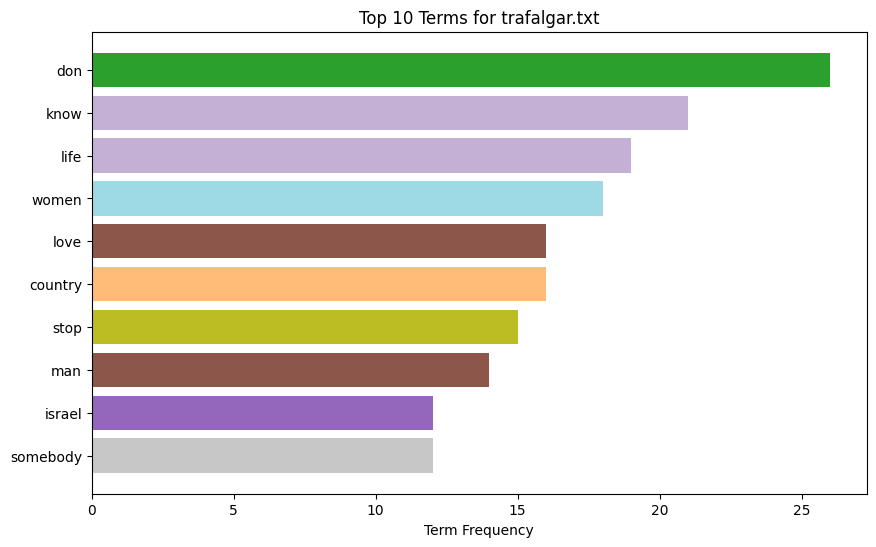


Top 10 terms for file horizontal.txt:
braff: 21
love: 20
harry: 20
got: 18
good: 13
flag: 12
goodbye: 12
checkered: 11
just: 8
change: 8


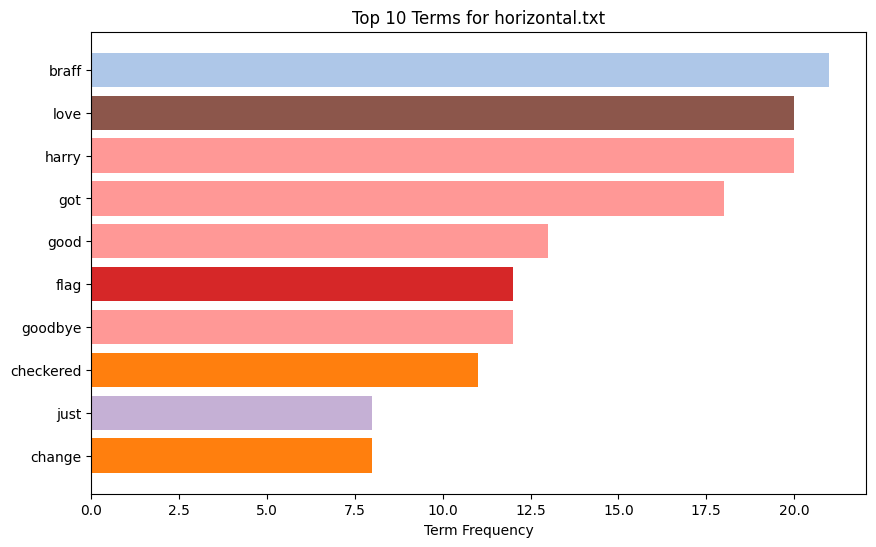


Top 10 terms for file cucumber_castle.txt:
love: 29
left: 13
lay: 12
believe: 11
sing: 10
know: 10
die: 9
stand: 8
tell: 8
long: 8


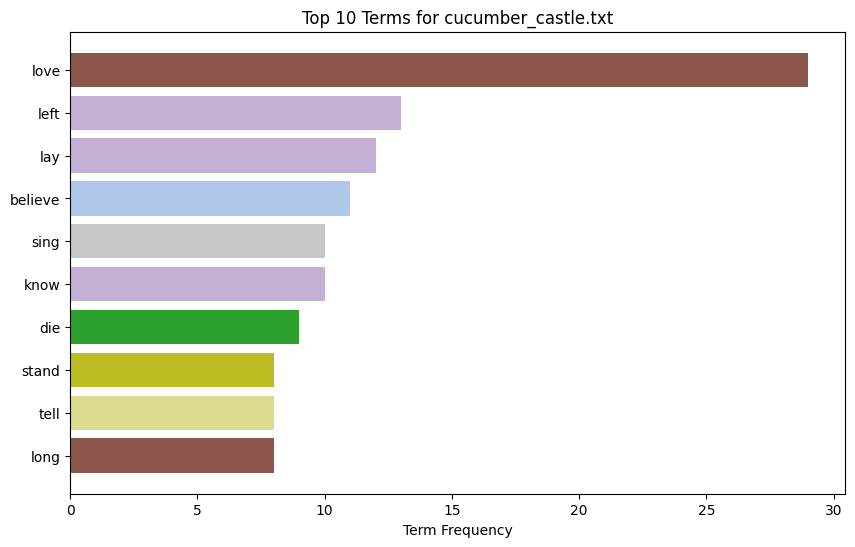


Top 10 terms for file this_is_where_i_came_in.txt:
know: 37
don: 25
baby: 16
like: 16
love: 15
night: 12
heart: 12
just: 10
away: 9
world: 8


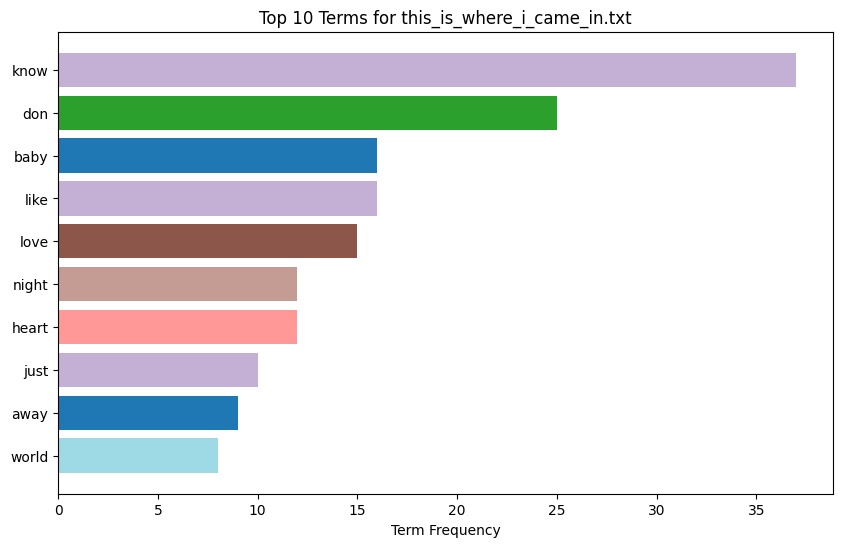


Top 10 terms for file idea.txt:
love: 16
millions: 12
don: 10
kitty: 10
got: 9
just: 9
world: 9
eve: 9
know: 8
air: 8


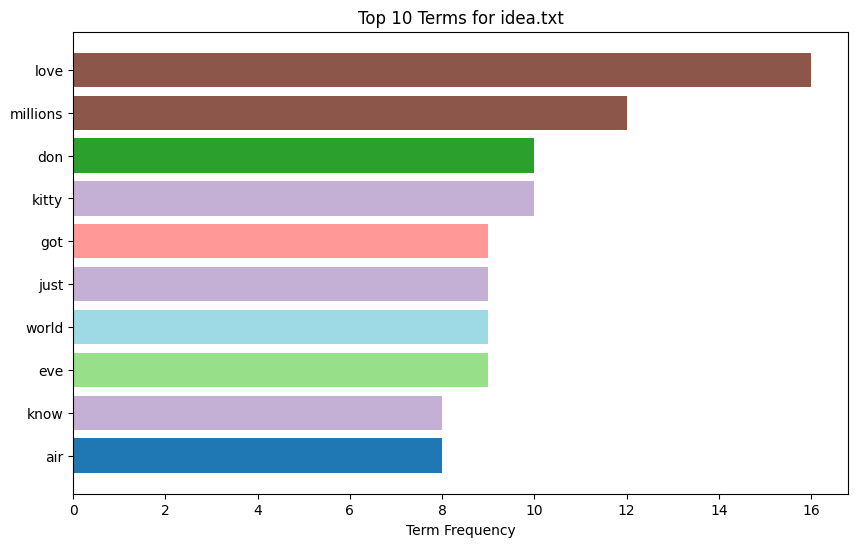


Top 10 terms for file barry_gibb_songs.txt:
don: 42
love: 32
know: 22
make: 22
mind: 19
cause: 17
wind: 15
timber: 15
true: 12
end: 11


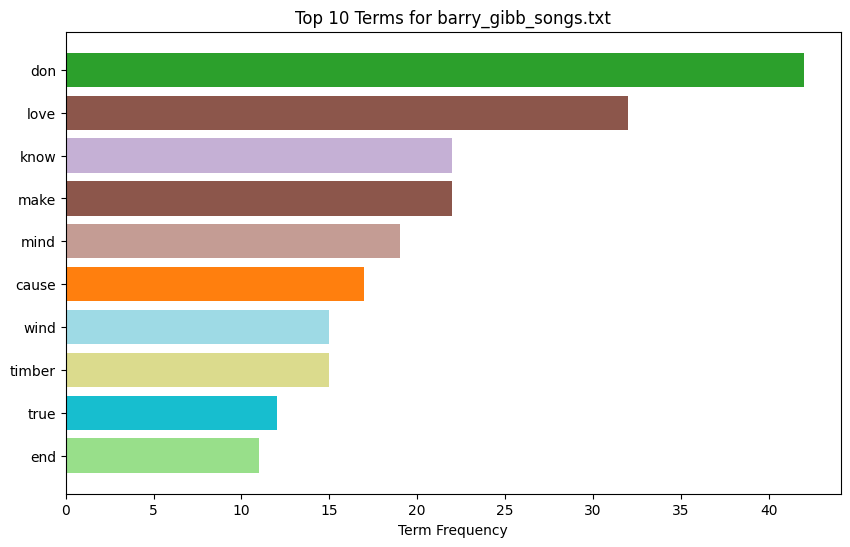


Top 10 terms for file spirits_having_flown.txt:
love: 25
got: 17
livin: 16
ain: 12
don: 9
living: 9
day: 9
tragedy: 8
instead: 8
girl: 8


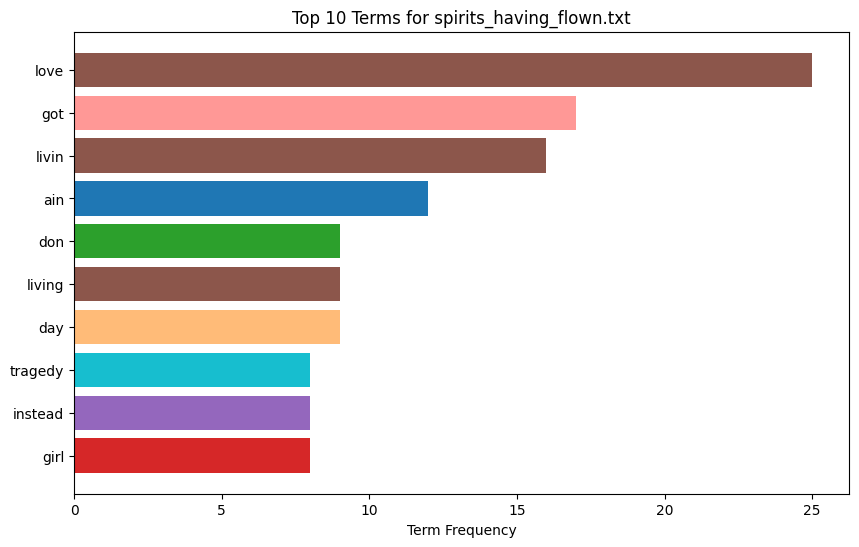


Top 10 terms for file esp.txt:
love: 22
don: 21
know: 14
baby: 10
gonna: 9
stay: 9
let: 9
got: 9
giving: 7
crazy: 7


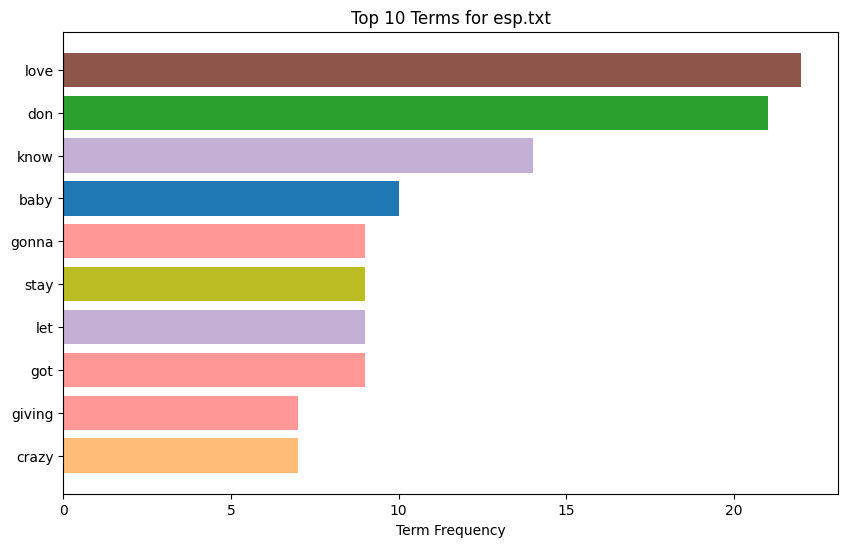


Top 10 terms for file turn_around_look_at_us.txt:
gone: 28
love: 21
don: 17
make: 12
say: 12
red: 12
cherry: 11
want: 11
kiss: 11
end: 10


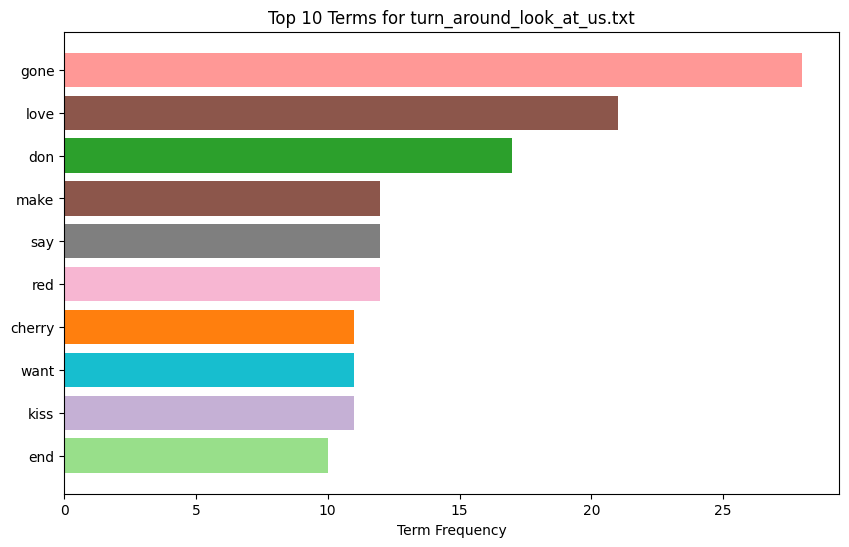


Top 10 terms for file saturday_night_fever.txt:
yeah: 14
talkin: 13
jive: 12
love: 9
woman: 9
just: 9
stayin: 7
alive: 7
know: 7
dancing: 6


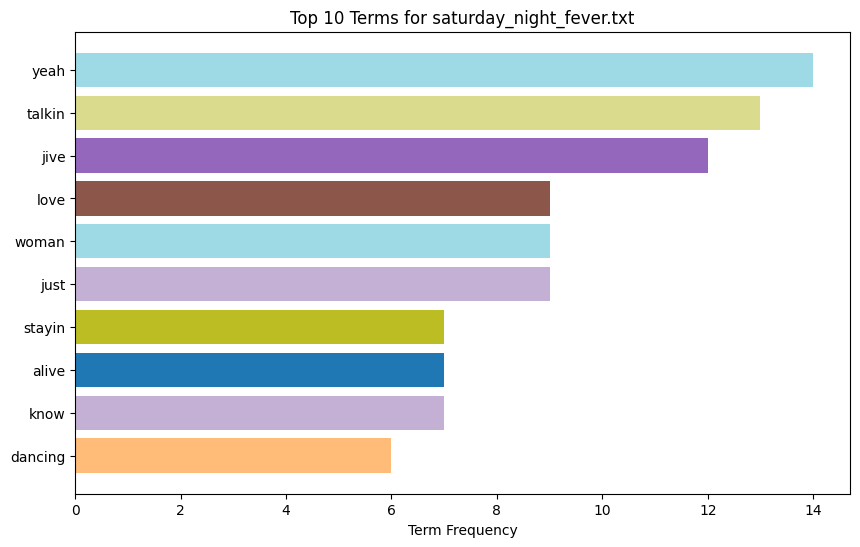


Top 10 terms for file size_isnt_everything.txt:
love: 16
know: 10
doing: 9
night: 9
blue: 9
island: 8
dancing: 8
yeah: 8
heart: 7
let: 6


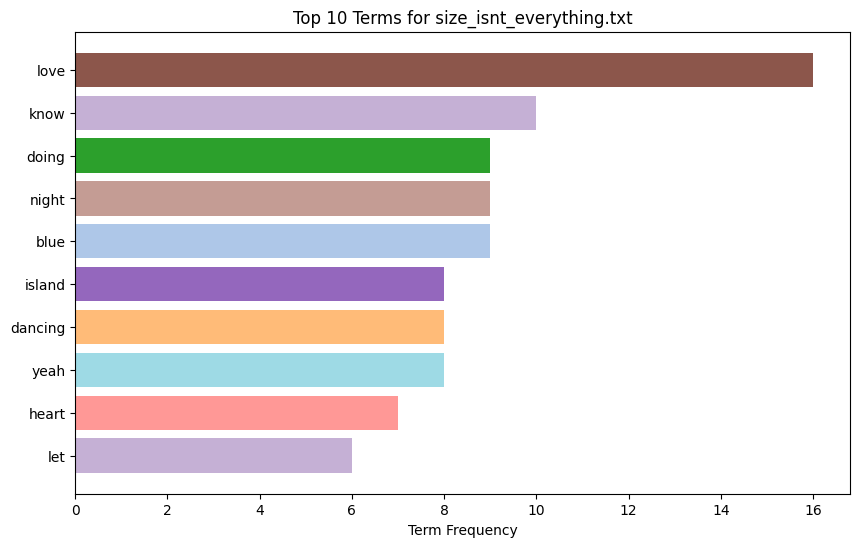


Top 10 terms for file mr_natural.txt:
doo: 24
love: 20
road: 18
don: 16
know: 14
gonna: 12
won: 11
ain: 11
night: 11
spoke: 10


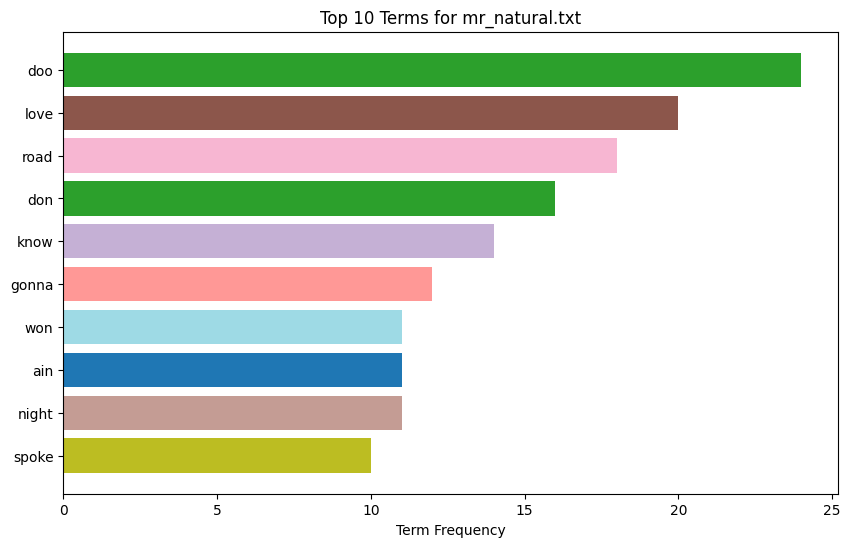


Top 10 terms for file two_years_on.txt:
tell: 20
home: 12
got: 10
day: 10
good: 9
just: 9
lonely: 8
did: 7
gonna: 7
nights: 7


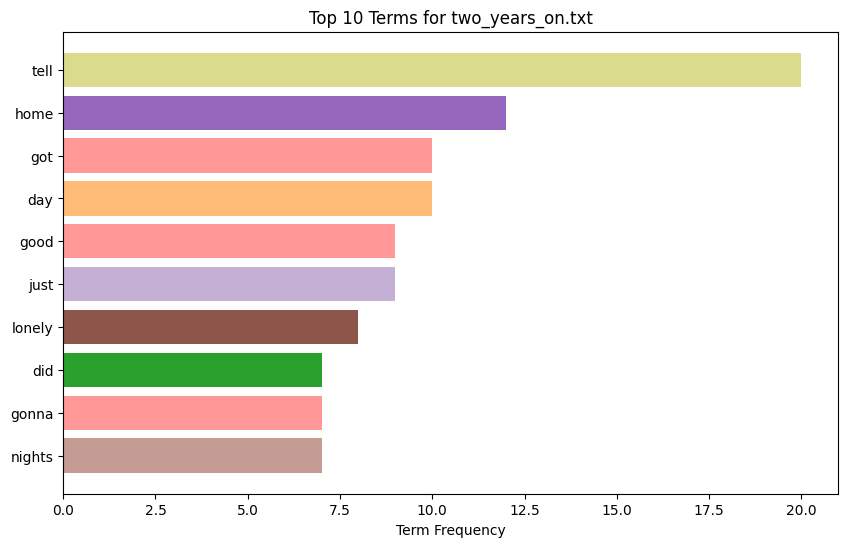


Top 10 terms for file odessa.txt:
say: 16
whisper: 14
just: 14
face: 12
love: 10
stay: 10
edison: 9
life: 9
like: 8
got: 8


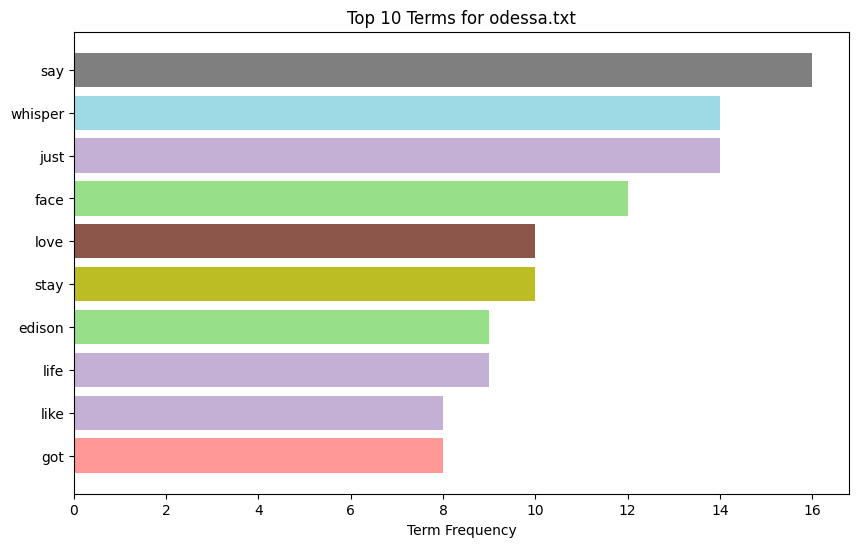


Top 10 terms for file one.txt:
love: 17
ordinary: 12
don: 12
living: 10
just: 9
world: 9
good: 8
life: 8
let: 8
inside: 8


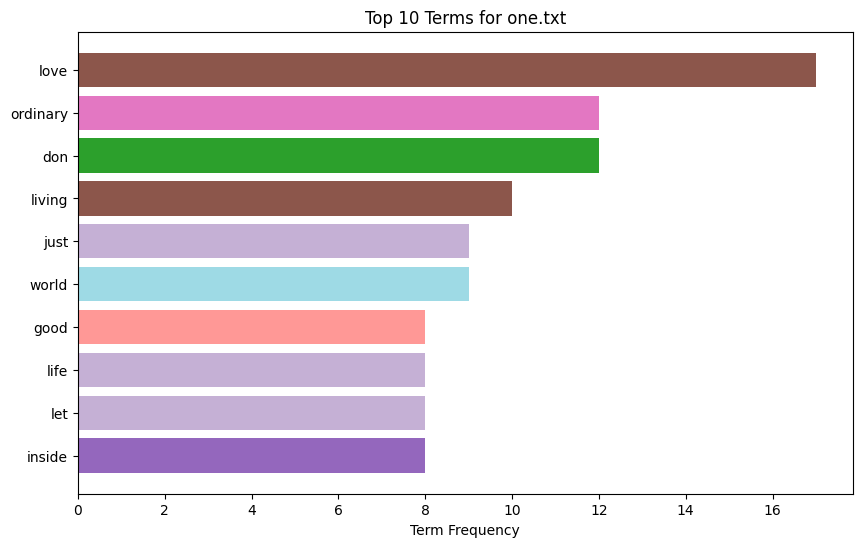


Top 10 terms for file spicks_and_specks.txt:
love: 22
don: 17
baby: 16
play: 15
man: 13
just: 10
high: 9
born: 8
rain: 8
know: 8


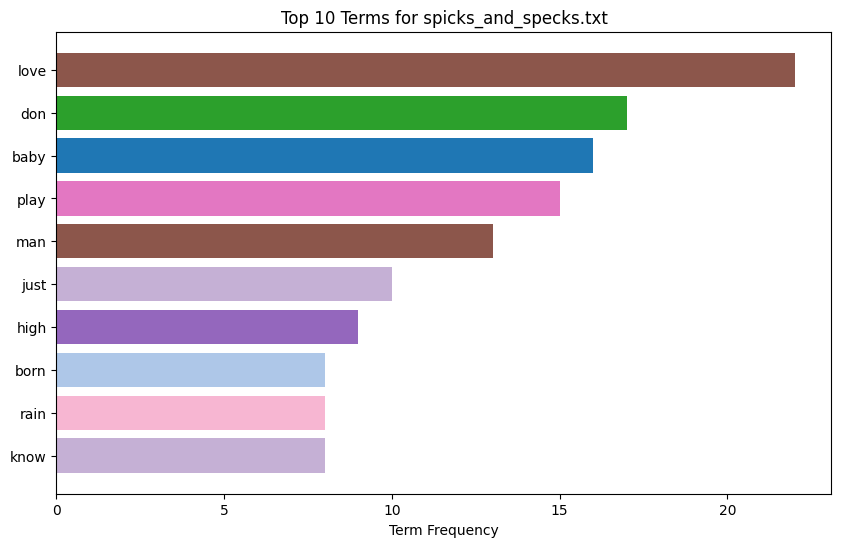


Top 10 terms for file children_of_the_world.txt:
love: 23
lovers: 18
life: 17
make: 15
stepped: 14
got: 11
just: 11
ooh: 10
let: 8
good: 8


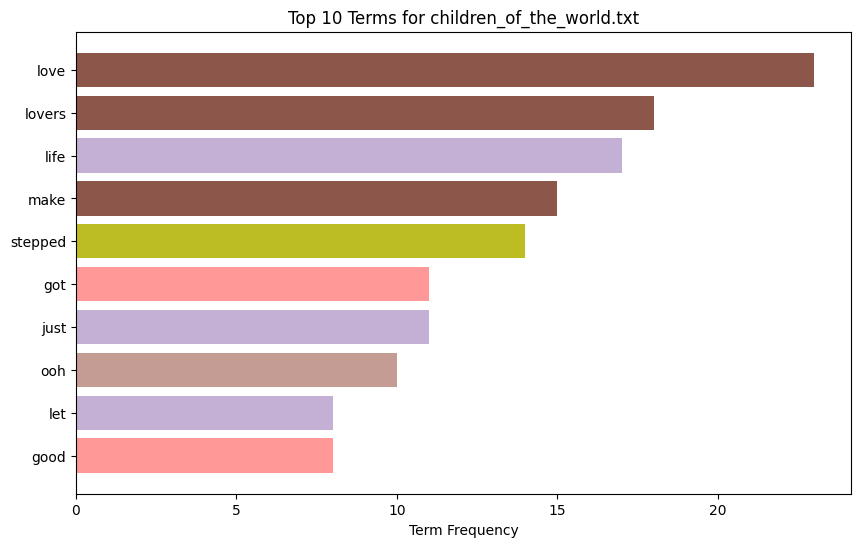

In [7]:
#attempt 4.2: # attempt 4: same as attempt 3 but with changes to vis: x-axis = word count instead of tf-idf score, and each word is assigned one color throughout all graphs for easier visualization
import os
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Define the directory containing your files
directory_path = '/Users/maika/My_Notebooks/DSMA/Final_Project/scraped_lyrics'

# List to store the content of all files and their filenames
documents = []
file_names = []

# Read all files in the directory (assuming text files)
for filename in os.listdir(directory_path):
    if filename.endswith('.txt'):  # Ensure we're reading only text files
        file_path = os.path.join(directory_path, filename)
        with open(file_path, encoding='utf-8-sig') as file:
            documents.append(file.read())  # Add content to the list
            file_names.append(filename)  # Add the filename to the list

# Define a custom tokenizer that filters out words with fewer than 3 characters
def custom_tokenizer(text):
    # Use regular expression to split the text into words and filter based on length
    words = re.findall(r'\b\w{3,}\b', text.lower())  # Words with 3 or more letters
    return words

# Initialize the CountVectorizer to get term frequencies
vectorizer = CountVectorizer(stop_words='english', tokenizer=custom_tokenizer)

# Fit and transform the documents to get term frequency matrix
X = vectorizer.fit_transform(documents)

# Get the feature names (terms)
terms = vectorizer.get_feature_names_out()

# Get the term frequencies for all documents (in a dense format)
term_freq_matrix = X.toarray()

# Map each term to a unique color
unique_terms = np.unique(terms)  # All unique terms
colors = cm.get_cmap('tab20', len(unique_terms))  # Create a color map (20 colors)

# Create a dictionary to map each term to a color
term_color_map = {term: colors(i) for i, term in enumerate(unique_terms)}

# Loop through each document and get the top 10 terms by term frequency
for i, doc in enumerate(documents):
    # Get the term frequencies for the current document (as a 1D array)
    term_frequencies = term_freq_matrix[i]

    # Get the top 10 indices (terms with the highest term frequencies)
    top_indices = np.argsort(term_frequencies)[::-1][:10]

    # Get the corresponding top 10 terms and their frequencies
    top_terms = [terms[index] for index in top_indices]
    top_frequencies = [term_frequencies[index] for index in top_indices]

    # Print the result for the current document
    print(f"\nTop 10 terms for file {file_names[i]}:")
    for term, freq in zip(top_terms, top_frequencies):
        print(f"{term}: {freq}")

    # Create a bar chart for the top 10 terms
    plt.figure(figsize=(10, 6))
    plt.barh(top_terms, top_frequencies, color=[term_color_map[term] for term in top_terms])
    plt.xlabel('Term Frequency')
    plt.title(f'Top 10 Terms for {file_names[i]}')
    plt.gca().invert_yaxis()  # To display the highest frequency at the top
    plt.show()
